# Applications of Programming

Here are various applications (uses) of programming. I've tried to focus on Python where applicable, and included some basic examples. You're invited to explore!

P.S. The icon at the top of the left panel in this Notebook is a table of contents. I recommend you use it to easily jump between topics.

## Third-party packages

All these examples will begin with an `import`. However, we can't rely on built-in modules like `math` for everything we want to do; instead, we need to use third-party libraries. To use them on your own computer, you will need to install them.

This is done by typing in the command line / bash:

`pip install _name_`

where `_name_` is the library you want to use. For example, image manipulation is done using the Pillow library. To install this library, type at the command line or bash:

`pip install Pillow`

The import name does not always correspond to the library name, making things slightly difficult. In the case of Pillow, the module is called `PIL`, so your script starts with `import PIL`.

The Python environment in this Google Colab Notebook has most of the libraries we'll see loaded into it, but not all. To try them here, we make Colab run a command/bash line by prefixing it with `!`, such as:

`!pip install Pillow`

---

## URL retrieval

Programmatically downloading files from URLs. Not only is this a useful time-saver, but it's also used in some of the later examples, so I'll start with it.

Two common libraries are [urllib](https://docs.python.org/3/library/urllib.html) and [requests](https://requests.readthedocs.io/en/master/):


In [ ]:
import urllib

# To download the file to your computer
cat_image_url = 'https://c.files.bbci.co.uk/12A9B/production/_111434467_gettyimages-1143489763.jpg'
urllib.request.urlretrieve(cat_image_url, 'cat.jpg') # 2nd argument is filename

In [2]:
import requests

# To make the data available as a Python variable
cat_image_url = 'https://c.files.bbci.co.uk/12A9B/production/_111434467_gettyimages-1143489763.jpg'
cat_image_data = requests.get(cat_image_url, stream=True)
print(cat_image_data.raw)

## Web scraping

While we're downloading URLs, we can also extract data from them programmatically. This involves parsing the HTML data of webpages.

Python has a builtin backpage for this called [BeautifulSoup](https://pypi.org/project/beautifulsoup4/).

In [3]:
from bs4 import BeautifulSoup
import requests

# Let's get the CBC current weather page for Toronto
url = 'https://www.cbc.ca/weather/s0000458.html'
html = requests.get(url).text

# Save the html file to a text file for reference to read through its structure
f = open('weather_html.txt', 'w')
f.write(html)
f.close()

# Parse the HTML into a "soup" of data
# See documentation here: https://www.crummy.com/software/BeautifulSoup/bs4/doc/
soup = BeautifulSoup(html, 'html.parser')

# Now the tedious part of navigating an HTML structure unique to each page.
# I had to inspect the HTML by hand to identify its structure, but once I have
# the 'ltemp' & 'celsius' identifiers, I could use this script to automatically
# pull the current Celsius in Toronto in future.

temp_tag = soup.find(id='ltemp')
celsius_tag = temp_tag.find(class_='celsius')
celsius_text = celsius_tag.get_text().strip()

print(f'The temperature in Toronto is currently {celsius_text}')

The temperature in Toronto is currently 24°C


## Image manipulation

Programmatically creating, modifying, and saving images in various formats.

For example, using [Pillow](https://pillow.readthedocs.io/en/stable/index.html) to manipulate the image and [IPython](https://ipython.org/) to display it:

Image is 976 pixels wide
Image is 549 pixels tall


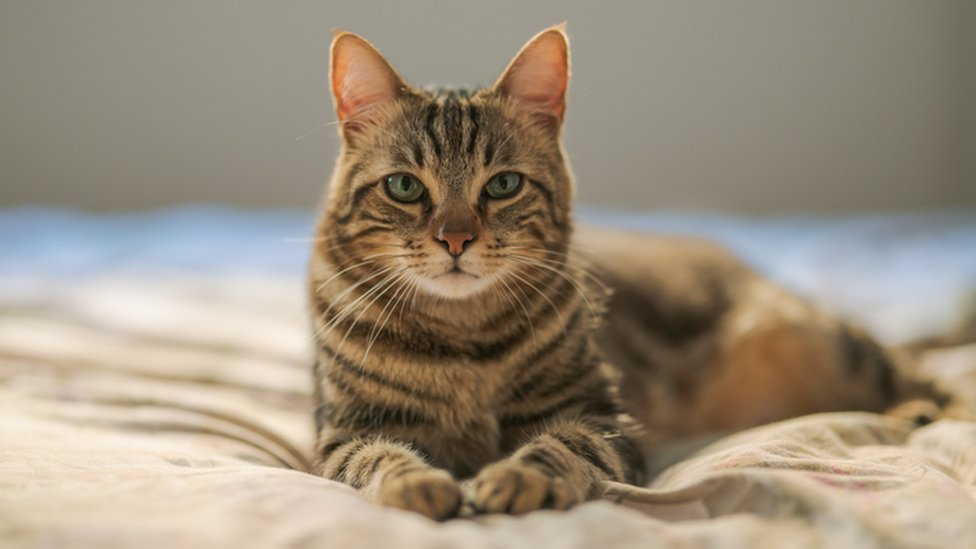

In [4]:
import PIL, IPython, urllib

cat_image_url = 'https://c.files.bbci.co.uk/12A9B/production/_111434467_gettyimages-1143489763.jpg'
urllib.request.urlretrieve(cat_image_url, 'cat.jpg')
cat_image = PIL.Image.open('cat.jpg')

print(f'Image is {cat_image.width} pixels wide')
print(f'Image is {cat_image.height} pixels tall')

IPython.display.Image(filename='cat.jpg')

Making into a thumbnail...
Thumbnail is 128 pixels wide
Thumbnail is 72 pixels tall


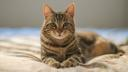

In [5]:
import PIL, IPython, urllib

cat_image_url = 'https://c.files.bbci.co.uk/12A9B/production/_111434467_gettyimages-1143489763.jpg'
urllib.request.urlretrieve(cat_image_url, 'cat.jpg')
cat_image = PIL.Image.open('cat.jpg')

print('Making into a thumbnail...')
cat_image.thumbnail([128, 128]) # turn it into a 128x128 pixel thumbnail

print(f'Thumbnail is {cat_image.width} pixels wide')
print(f'Thumbnail is {cat_image.height} pixels tall')

cat_image.save('thumb.jpg')
IPython.display.Image(filename='thumb.jpg')

## Graphing & statistics

Python is used very often in statistical analysis and creating graphs from data. In fact, it's an industry standard.

For example, using [Numpy](https://numpy.org/) for the stats and [Matplotlib](https://matplotlib.org/) for the graphs:

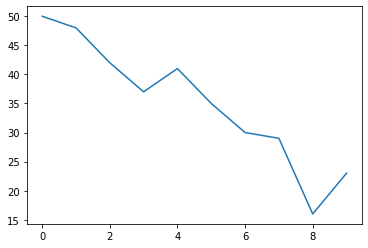

In [6]:
import numpy
import matplotlib.pyplot

y_axis = numpy.array([50, 48, 42, 37, 41, 35, 30, 29, 16, 23])
matplotlib.pyplot.plot(y_axis)


## Science

Building on the last section, one of the main applications of statistical analysis of data is in science. Python is used heavily in scientific applications, such as analyzing water samples for geographers, DNA sequences for bioinformatics, weather data for climatology, financial data for economics, health data, sociology, and more.

Here's an example where [Seaborn](https://seaborn.pydata.org/index.html) is used to generate a heat map, which is a 2D graph where areas of interest are brighter. We'll use random numbers here, but a heat map could be based on real data, say income, and overlaid semi-translucently on a map of a city to get a visual representation of areas at the greatest risk of poverty.

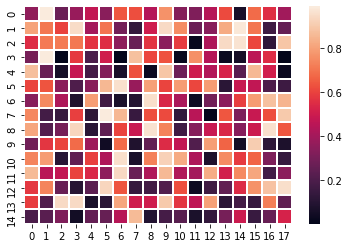

In [7]:
import numpy
import seaborn

data = numpy.random.random((15, 18)) # grid of random floats from 0.0 to 1.0
hm = seaborn.heatmap(data, linewidth=1)

## Audio manipulation

Programmatically creating, modifying, and saving audio files.

For example, using [SoundFile](https://pysoundfile.readthedocs.io/en/latest/) to manipulate the sound, [Matplotlib](https://matplotlib.org/) to chart data about the sound, and [IPython](https://ipython.org/) to play the sound:

Sampling rate: 8000 samples/second
Signal duration: 3.146 seconds


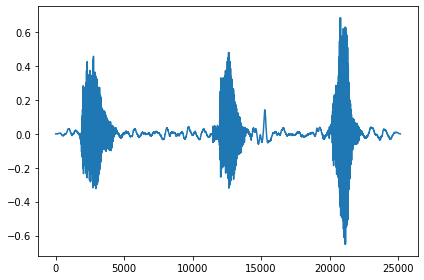

<Figure size 432x288 with 0 Axes>

In [9]:
import urllib.request
import soundfile
import matplotlib.pyplot as plt
from IPython.display import Audio

audio_url = 'https://vvestman.github.io/summerschool19/sounds/Count_Of_Three-8khz.wav'
urllib.request.urlretrieve(audio_url, 'sample_audio.wav') # download url to file

audio_signal, sampling_rate = soundfile.read('sample_audio.wav')

print(f'Sampling rate: {sampling_rate} samples/second')
print(f'Signal duration: {audio_signal.shape[0] / sampling_rate:.3f} seconds')
plt.plot(audio_signal)
plt.tight_layout()
plt.figure()

Audio(filename='sample_audio.wav')

## Document manipulation

Programmatically creating documents, e.g. Word, Excel, or PDF.

Here's an example using [python-docx](https://python-docx.readthedocs.io/en/latest/):

In [ ]:
# If Colab lacks a package, you can simulate command line/bash using ! like this
!pip install python-docx

print() # installing packages generates a lot of text, so just creating space...

import docx # import name happens to be different from package name

# Create a document with one paragraph
document = docx.Document()
paragraph = document.add_paragraph('Hey! Thanks for downloading me :)')
document.save('boring_document.docx')

print('\nMade a Word document. Click the folder icon at left to see it,')
print('download it, and view the contents!')

## Natural language processing

Analysis of natural languages (i.e. written documents). Yields many kinds of insights, from linguistic discoveries to spam detection. Also used for text prediction, such as your phone uses, and generation.

The main library for this is the Natural Language Toolkit ([nltk](https://www.nltk.org/)):

In [ ]:
import nltk

# nltk has sub-libraries you manually download as needed (because of size)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

sentence = "I propose that we analyze some text."

# Divide into words
tokens = nltk.word_tokenize(sentence)
print(tokens)

# Tag parts of speech (not perfectly accurate)
tagged = nltk.pos_tag(tokens)
print(tagged)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
['I', 'propose', 'that', 'we', 'analyze', 'some', 'text', '.']
[('I', 'PRP'), ('propose', 'VBP'), ('that', 'IN'), ('we', 'PRP'), ('analyze', 'VBP'), ('some', 'DT'), ('text', 'NN'), ('.', '.')]


Here's an example of NLP to generate a reading difficult score, based solely on sentence length (obviously we could further refine the score, but it's a start). We'll test it on the built-in NLTK corpus of public domain texts from Project Gutenberg, specifically Jane Austen's novel *Emma*.

In [ ]:
import nltk
nltk.download('gutenberg')

print("\nAnalyzing the reading difficulty of Jane Austen's Emma")

emma_sentences = nltk.corpus.gutenberg.sents('austen-emma.txt')
emma_words = nltk.corpus.gutenberg.words('austen-emma.txt')

words_per_sentence = len(emma_words) / len(emma_sentences)
print(f'Average words per sentence: {words_per_sentence:.1f}') # :.1f = 1 decimal

# Calculate reading difficulty based on this one metric
reading_difficulty = words_per_sentence / 3

# Limit reading difficulty to 10 using min (i.e. if value > 10, use 10 instead)
reading_difficulty = min(reading_difficulty, 10)

print(f'Reading difficulty score: {reading_difficulty:.1f}/10')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.

Analyzing the reading difficulty of Jane Austen's Emma
Average words per sentence: 24.8
Reading difficulty score: 8.3/10


## Robot control

As some of you discovered, you can program robots using Python rather than Mindstorms for more complicated tasks.

Here's an example using [Pybricks](https://pybricks.com/) — though nothing cool will happen when you run this since we have no [robot hooked up](https://education.lego.com/en-us/product-resources/mindstorms-ev3/teacher-resources/python-for-ev3):


In [ ]:
!pip install pybricks
print()

from pybricks.hubs import EV3Brick as brick
from pybricks.ev3devices import ColorSensor, Motor
from pybricks.parameters import Port, Color
from pybricks.robotics import DriveBase

left_motor = Motor(Port.B)
right_motor = Motor(Port.C)
robot = DriveBase(left_motor, right_motor, 100, 100)

color_sensor = ColorSensor(Port.S3) # Part of the brick, not the robot

for i in range(100): # Normally use while True, just avoiding infinite loop
  color = color_sensor.color()
  if color == Color.BLACK:
    robot.drive(100, 0) # drivespeed, turnspeed
  elif color_sensor == Color.WHITE:
    robot.drive(-100, 0) # drivespeed, turnspeed

print('\nChecked color sensor 100 times')

## Life automation

One aspect of life automation is [file organization](https://colab.research.google.com/drive/1OMseEgC5Qxi2GyRBtXD3G5yFEcZr5qiw?usp=sharing), but we can actually automate many more things.

You can make Python scripts to do many things, but we'll actually look instead at the popular [AutoHotkey](https://www.autohotkey.com/) on Windows. This program lets you bind hotkeys to run particular scripts.

For example, suppose you have a keyboard without a dedicated play/pause button for music. With AutoHotkey installed, you could assign play/pause to the convenient keypress `Ctrl Alt p` by making a text file with this content:

```
^!p::
  send {Media_Play_Pause}
return
```

You would then save this file as `play_pause.ahk` or something similar, make a shortcut to it, and place said shortcut in your [Windows startup folder](https://www.thewindowsclub.com/startup-folder-in-windows-8) to have it run automatically on login. Then, `Ctrl Alt p` will toggle play/pause in future.

This is also the technology I used to make the [Maccents](https://sawczak.com/tdch/maccents/) (easy French accents) script installed on every computer in the school.

## Machine learning (AI)

Machine learning is processing large amounts of data and generalizing what it has in common. For example, after reading 10^7 spam emails it could try to classify new emails as spam or legitimate; after seeing 10^7 routes around various obstacles it could try to generate new routes for self-driving cars; after listening to 10^7 songs rated for popularity and combined with sheet music, it could try to write a new song.

A common solution for Python [PyTorch](https://pytorch.org/), built on [torch.ai](https://www.torch.ai/). However, the complexity of the setup is such that it's too difficult to construct an example in this context. This is material one normally starts around the third year of university. If you're curious, you can pursue it using [tutorials like these](https://pytorch.org/tutorials/recipes/recipes_index.html).

## Websites & online apps

Arguably the biggest professional market in comp sci right now is web apps. (Mobile apps are a close contender, but note that websites target both phones *and* desktops, plus many mobile apps are actually just websites with the browser UI hidden.)

This is easily multiple courses on its own, but note that there are two basic kinds of website. The first are frontend-first sites, built on the core technologies of the web: [HTML](https://developer.mozilla.org/en-US/docs/Web/HTML) (structure), [CSS](https://developer.mozilla.org/en-US/docs/Web/CSS/) (styling), [JavaScript](https://developer.mozilla.org/en-US/docs/Web/JavaScript) (functionality), usually paired with [PHP](https://developer.mozilla.org/en-US/docs/Glossary/PHP) for basic logic and [SQL](https://developer.mozilla.org/en-US/docs/Glossary/Database) or a similar database technology to store the data. "Make your own site" tools like [WordPress](https://wordpress.org/) or [Squarespace](https://www.squarespace.com/) are usually this kind.

The other is one that has a true backend, e.g. a Python app that just happens to output some data to a frontend — usually accessible in multiple formats, such as Discord being available in the browser, desktop apps, or mobile apps, all of them just being frontends for the same program running on [Discord](https://discord.gg/) servers.

It's highly worth investigating at least how to make the former kind. Use a tool like [CodePen](https://codepen.io/) to instantly see results as you experiment. For example, here's a [mini CodePen demo](https://codepen.io/pen/?editors=0110) (the code for it is below).

For the second kind, you need to learn more, either at university or college or through an online course like [this one](https://www.udemy.com/course/python-and-django-full-stack-web-developer-bootcamp/). 

In [ ]:
# NONE OF THIS IS PYTHON
# To see it in action and/or edit it
# Make a new CodePen at https://codepen.io/
# and copy these blocks into the respective editors

In [ ]:
# HTML
print("""
<div id='app'>
  <div id='logo'>
    <div id='logo-text'>
      MegaCorp
    </div>
  </div>
  <div id='coming-soon'>
    <div id='coming-soon-text'>
      <a href='mailto:info@example.com' title='Email Info Department'>info@example.com</a>
      <br><br>
      <a href='tel:9055555555' title='Call MegaCorp'>(905) 555-5555</a>
    </div>
  </div>
</div>
""")

In [ ]:
# CSS
print("""
#app {
  background: #224987;
  position: absolute;
  top: 0;
  left: 0;
  right: 0;
  bottom: 0;
  display: block;
  transition-duration: 2s;
  transition-timing-function: ease;
  /* transition-timing-function: cubic-bezier(0.25, 0.1, 0.5, 1); */
}

#logo {
  margin: auto;
  margin-top: 20%;
  font-size: 60px;
}

#coming-soon {
  margin-top: 10%;
  font-size: 30px;
}

#logo-text,
#coming-soon-text {
  color: white;
  font-family: "Helvetica", "Arial", sans-serif;
  letter-spacing: 0.5px;
  text-align: center;
  transition-duration: 0.5s;
  transition-timing-function: ease;
}

a {
  color: white;
  cursor: auto;
}

#coming-soon-text {
  opacity: 0;
  transition-duration: 1;
  transition-timing-function: ease;
}

#coming-soon-text,
#coming-soon-text a,
#coming-soon-text a:hover {
  cursor: default;
  text-decoration: none;
}

#coming-soon-text.show a:hover {
  cursor: pointer !important;
  text-decoration: underline;
}

#coming-soon-text.show {
  opacity: 1;
}

#app.darker {
  background: #112545;
}

#logo-text::after {
  content: "";
  position: relative;
  top: 40px;
  left: 50%;
  width: 1%;
  height: 1px;
  background: none;
  display: block;
  transition-duration: 2s;
  transition-timing-function: ease;
}

#logo-text.underline::after {
  content: "";
  position: relative;
  top: 40px;
  left: 0;
  width: 100%;
  height: 1px;
  background: #efefef;
  display: block;
}

""")

In [ ]:
# JS
print("""
setTimeout(function () {
  let app = document.getElementById("app");
  app.classList.add("darker");
}, 0.25);

setTimeout(function () {
  let logoText = document.getElementById("logo-text");
  let comingSoonText = document.getElementById("coming-soon-text");
  logoText.classList.add("underline");
  comingSoonText.classList.add("exist");
}, 1500);

setTimeout(function () {
  let comingSoonText = document.getElementById("coming-soon-text");
  comingSoonText.classList.add("show");
}, 3500);
""")

## Mobile apps

Mobile apps are also a very large market right now, and there are many tools to create them. One of the more common languages for mobile apps is [Java](https://en.wikipedia.org/wiki/Java_(programming_language)).

It can be done in Python, however, though it won't run successfully in Google Colab. Here just for reference is how one would start an app using the Python library [Kivy](https://realpython.com/mobile-app-kivy-python/):


In [ ]:
from kivy.app import App
from kivy.uix.button import Button

class ButtonApp(App):
    def build(self):
        return Button()

    def on_press_button(self):
        print('You pressed the button!')

if __name__ == '__main__':
    app = ButtonApp()
    app.run()


## Desktop apps

These began by being the norm in software, and in some ways still are in the use of Word, Photoshop, Indesign, and so forth, especially for professional purposes. Even if you do everything online, however, the browser would be your gateway in.

Python isn't typically used for desktop apps, but it does have a built-in GUI (graphical user interface) library, [tkinter](https://docs.python.org/3/library/tkinter.html).

### Grid

Here's a simple example. It will not work in Google Colab, which has no actual display set up, but if you save this code to a `.py` file and try it on your computer you'll see it.

In [ ]:
import os
import tkinter
from tkinter import scrolledtext
from tkinter import filedialog

DEFAULT_FONT = ["Arial Bold", 15]

def create_window() -> tkinter.Tk:
    """
    Create and return the main window of the program.
    """

    # Create the window    
    window = tkinter.Tk()
    window.title('My First GUI Program')
    window.geometry('800x600')

    # Create a label
    lbl = tkinter.Label(window,
                        text="Welcome to the program! I read text files.",
                        font=DEFAULT_FONT)
    lbl.grid(column=0, row=0)

    # Create a textbox
    txt = scrolledtext.ScrolledText(window, width=80, height=20)
    txt.grid(column=0, row=3, pady= 20, padx=20)

    # Create a button to choose a file to preview
    btn_A_command = lambda: update_text_content(txt)
    btn_A = tkinter.Button(window, text="Click to choose a text file",
                           bg='green', fg='white',
                           font=DEFAULT_FONT, command=btn_A_command)
    btn_A.grid(column=0, row=1)

    # Create a button to clear the file preview
    btn_B_command = lambda: clear_text_content(txt)
    btn_B = tkinter.Button(window, text="Click to clear the preview",
                           bg='red', fg='white',
                           font=DEFAULT_FONT, command=btn_B_command)
    btn_B.grid(column=0, row=2)

    window.mainloop()
    return window


def update_text_content(txt: tkinter.scrolledtext.ScrolledText) -> None:
    """Update the given textbox with the text of a file the user chooses."""
    content = get_file_contents()
    
    txt.delete('1.0', tkinter.END)
    txt.insert(tkinter.INSERT, content)

def clear_text_content(txt: tkinter.scrolledtext.ScrolledText) -> None:
    """Clear the given textbox."""
    txt.delete('1.0', tkinter.END)
    

def get_file_contents() -> str:
    """Return the contents of a text file the user chooses."""
    filename = prompt_filename()
    
    f = open(filename, 'r')
    content = f.read()
    f.close()

    return content
    

def prompt_filename() -> str:
    """Prompt the user to pick a text file and return the path to the file."""

    filename = filedialog.askopenfilename(
        initialdir='.',
        title='Choose a text file',
        filetypes=[['Text files', '*.txt']]
    )

    return filename


def run() -> None:
    """Run the program."""
    window = create_window()

run()

### Canvas

An alternative interface uses canvas instead of grid; it's preferable for finer control over where things end up.

In [ ]:
from tkinter import *
import os
import urllib

# initialize the root window
root = Tk()
root.title('Canvasy Goodness')
root.geometry('800x600')

# initialize the canvas
canvas = Canvas(root, height=600, width=800)
canvas.pack()

# background is a big black rectangle
background = canvas.create_rectangle(0, 0, 800, 800, fill='black')

# sun and moon are just circles :)
sun = canvas.create_oval(50, 50, 250, 250, fill='yellow')
moon = canvas.create_oval(525, 350, 575, 400, fill='white')

# earth is more complicated so let's use an existing image
earth_url = 'https://i.imgur.com/JUlVGdp.png'
urllib.request.urlretrieve(earth_url, 'earth.png')
earth_image = PhotoImage(file='earth.png')

# add it to the canvas
earth = canvas.create_image(400, 400, anchor=NW, image=earth_image)

# run the program
root.mainloop()


## Video games

It's pretty self-evident that you need programming to make video games. It's not really possible to do a good demo in this medium, but look into [Unity for modern games](https://unity.com/solutions/game), or [HTML5 for browser-based games](https://developer.mozilla.org/en-US/docs/Games/Introduction).

Of course, back in the day, video games were all text... we can still create simple video games using a frame-based system like the below :) It uses the `time` module to regulate the frames per second, and the [keyboard](https://pypi.org/project/keyboard/) library to detect keypresses in the midst of a `while` loop (rather than waiting for input, which would pause execution every time).

***NOTE: The game will not run in Google Colab because the virtual environment does not have  access to your keyboard. To try the game, copy the script into a `.py` file, go to command/bash and do `pip install keyboard`, and then run the `.py` script directly. (Don't run it in Idle because the frame refresh won't work properly.)***

In [ ]:
import time
import os

# Try to import keyboard; instruct user to install if it's not present
try:
  import keyboard
except:
  print('keyboard module not found')
  print('Go to command/bash, and enter: ')
  print('\npip install keyboard\n')
  print('Then come back and run this script again')
  input('Hit Enter to quit')
  quit()

# Constants
FPS = 120 # frames per second cap
SPF = 1 / FPS # seconds per frame
MAP_SIZE = 18

# Starting positions of U O Z on the map
U_X = 1
U_Y = 1
O_X = (MAP_SIZE - 2) // 2
O_Y = (MAP_SIZE - 2) // 2
Z_X = MAP_SIZE - 2
Z_Y = MAP_SIZE - 2

def clear_screen() -> None:
  """Clear the console screen."""

  # Windows
  if os.name == 'nt':
    os.system('cls')
  
  # Mac & Linuxs
  else:
    os.system('clear')

def initialize_grid() -> list:
  """Return a grid of MAP_SIZE * MAP_SIZE where every position is a space."""
  grid = []
  
  for i in range(MAP_SIZE):
    row = []
    
    for j in range(MAP_SIZE):
      char = ' '

      if i == 0 or i == MAP_SIZE - 1:
        char = '-'
      elif j == 0 or j == MAP_SIZE - 1:
        char = '|'
      
      row.append(char)
      
    grid.append(row)
    
  return grid

def update_grid(grid: list, u_x: int, u_y: int, o_x: int, o_y: int,
                z_x: int, z_y: int) -> None:
    """
    Update the given grid in-place. Fill in the given (x, y) coordinates with 
    the U, O, and Z characters.
    """

    grid[o_y][o_x] = 'O'
    grid[z_y][z_x] = 'Z'
    grid[u_y][u_x] = 'U' # this comes last so it shows if overlapping the others


def format_grid(grid: list) -> str:
  """Return the text of the formatted grid."""

  text = '\n'
  for row in grid:
    text += '\n' + ' '.join(row)
  return text

def format_instructions() -> str:
  """Return the text of the instructions."""

  text = ''
  text += 'This is a simple game where U can move around a 2D grid.'
  text += '\nUse the keyboard arrows to move. Touch O to win. Touch Z to lose.'
  text += '\nP.S. Play this by running the Python script itself, not Idle.'
  text += '\n\nHit Enter to start!'
  return text

def frame(u_x: int, u_y: int, o_x: int, o_y: int, z_x: int, z_y: int) -> None:
  
  # First we calculate to minimize time between clear and show
  grid = initialize_grid()
  update_grid(grid, u_x, u_y, o_x, o_y, z_x, z_y)
  
  clear_screen()

  # Print all text at once for speed (print is quite slow in a gaming context)
  print(format_instructions() + '\n' + format_grid(grid) + '\n')

def end_game(won: bool) -> None:
  """Print whether the user won or lost the game."""

  print()

  if won:
    print('You won! :)')
  else:
    print('You lost! :(')
  
def run() -> None:
  """Initialize and run the main game loop."""

  clear_screen()
  print(format_instructions())
  input() # wait for Enter to start the game

  # initial positions
  u_x, u_y = U_X, U_Y
  o_x, o_y = O_X, O_Y
  z_x, z_y = Z_X, Z_Y

  won = None
  while True:

    frame_start = time.time()

    # Detect movement and update map
    if keyboard.is_pressed('left'):
      u_x = max(1, u_x - 1)
    if keyboard.is_pressed('right'):
      u_x = min(MAP_SIZE - 2, u_x + 1)
    if keyboard.is_pressed('up'):
      u_y = max(1, u_y - 1)
    if keyboard.is_pressed('down'):
      u_y = min(MAP_SIZE - 2, u_y + 1)

    # Detect win
    if (u_x, u_y) == (o_x, o_y):
      won = True
      break

    # Detect lose
    elif (u_x, u_y) == (z_x, z_y):
      won = False
      break

    # Show updated frame
    frame(u_x, u_y, o_x, o_y, z_x, z_y)

    # Calculate how long the frame took to run
    frame_finish = time.time()
    frame_time = frame_finish - frame_start
    extra_time = SPF - frame_time

    # Fake vsync by waiting for next frame if we finished too fast
    if extra_time > 0:
      time.sleep(extra_time)

  # Do a final frame where U is on the target, then end the game
  frame(u_x, u_y, o_x, o_y, z_x, z_y)
  end_game(won)

  input('\nHit Enter to quit')

run()
